In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
url = "https://raw.githubusercontent.com/KaushikMreddy/TalkCrops_Capstone/main/Crop_recommendation.csv"

data_raw = pd.read_csv(url);

data_raw.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data_raw.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
min_max_by_crop = data_raw.groupby('label')[['N', 'P', 'K','temperature','humidity','ph','rainfall']].agg(['min', 'max'])
min_max_by_crop

N         P         K      temperature              humidity  \
             min  max  min  max  min  max         min        max        min   
label                                                                         
apple          0   40  120  145  195  205   21.036527  23.996862  90.025751   
banana        80  120   70   95   45   55   25.010185  29.908885  75.031933   
blackgram     20   60   55   80   15   25   25.097374  34.946616  60.065349   
chickpea      20   60   55   80   75   85   17.024985  20.995022  14.258040   
coconut        0   40    5   30   25   35   25.008724  29.869083  90.017345   
coffee        80  120   15   40   25   35   23.059519  27.923744  50.045570   
cotton       100  140   35   60   15   25   22.000851  25.992374  75.005393   
grapes         0   40  120  145  195  205    8.825675  41.948657  80.016394   
jute          60  100   35   60   35   45   23.094338  26.985822  70.882596   
kidneybeans    0   40   55   80   15   25   15.330426  24.923601  18.092240   
lentil         0   40   55   80   15   25   18.064861  29.944139  60.091166   
maize         60  100   35   60   15   25   18.041855  26.549864  55.282204   
mango          0   40   15   40   25   35   27.003155  35.990097  45.022364   
mothbeans      0   40   35   60   15   25   24.018254  31.999286  40.009334   
mungbean       0   40   35   60   15   25   27.014704  29.914544  80.034996   
muskmelon     80  120    5   30   45   55   27.024151  29.943492  90.015064   
orange         0   40    5   30    5   15   10.010813  34.906653  90.006217   
papaya        31   70   46   70   45   55   23.012402  43.675493  90.038631   
pigeonpeas     0   40   55   80   15   25   18.319104  36.977944  30.400468   
pomegranate    0   40    5   30   35   45   18.071330  24.962732  85.129122   
rice          60   99   35   60   35   45   20.045414  26.929951  80.122675   
watermelon    80  120    5   30   45   55   24.043558  26.986037  80.026213   

                              ph              rainfall              
                   max       min       max         min         max  
label                                                               
apple        94.920481  5.514253  6.499227  100.117344  124.983162  
banana       84.978492  5.505394  6.490074   90.109781  119.847970  
blackgram    69.961000  6.500145  7.775306   60.417903   74.915595  
chickpea     19.969789  5.988993  8.868741   65.113656   94.781896  
coconut      99.981876  5.501580  6.470466  131.090008  225.632366  
coffee       69.948073  6.020947  7.493192  115.156401  199.473564  
cotton       84.876690  5.801048  7.994680   60.653817   99.931008  
grapes       83.983517  5.510925  6.499605   65.010953   74.915062  
jute         89.891065  6.002525  7.488014  150.235524  199.836291  
kidneybeans  24.969699  5.502999  5.998125   60.275525  149.744103  
lentil       69.923759  5.916454  7.841496   35.034848   54.939377  
maize        74.829137  5.513698  6.995844   60.651715  109.751538  
mango        54.964053  4.507524  6.967418   89.291476  100.812466  
mothbeans    64.955854  3.504752  9.935091   30.920140   74.443307  
mungbean     89.996156  6.218924  7.199495   36.120429   59.872321  
muskmelon    94.962187  6.002927  6.781050   20.211267   29.866814  
orange       94.964199  6.010392  7.995849  100.173796  119.694658  
papaya       94.944821  6.501521  6.993473   40.351531  248.859299  
pigeonpeas   69.691413  4.548202  7.445445   90.054227  198.829881  
pomegranate  94.998975  5.561852  7.199504  102.518476  112.475094  
rice         84.969072  5.005307  7.868475  182.561632  298.560117  
watermelon   89.984052  6.000976  6.956509   40.126504   59.759800

## Encoding the target data

In [5]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'target' is your target variable containing the 22 categories

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
features = data_raw.drop(columns=['label'])  # Exclude the target variable
target = data_raw['label']

# Fit and transform the target variable
encoded_target = label_encoder.fit_transform(target)

# Print the mapping of original categories to encoded labels
# print("Original Categories:", target.unique())

# Add the encoded value to the data_raw frame
data_raw['Encoded_Label'] = encoded_target

# Create a dictionary mapping original labels to their encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping
print("Label Mapping:")
for original_label, encoded_label in label_mapping.items():
    print(f"{original_label}: {encoded_label}")

Label Mapping:
apple: 0
banana: 1
blackgram: 2
chickpea: 3
coconut: 4
coffee: 5
cotton: 6
grapes: 7
jute: 8
kidneybeans: 9
lentil: 10
maize: 11
mango: 12
mothbeans: 13
mungbean: 14
muskmelon: 15
orange: 16
papaya: 17
pigeonpeas: 18
pomegranate: 19
rice: 20
watermelon: 21


## Check for Correlation

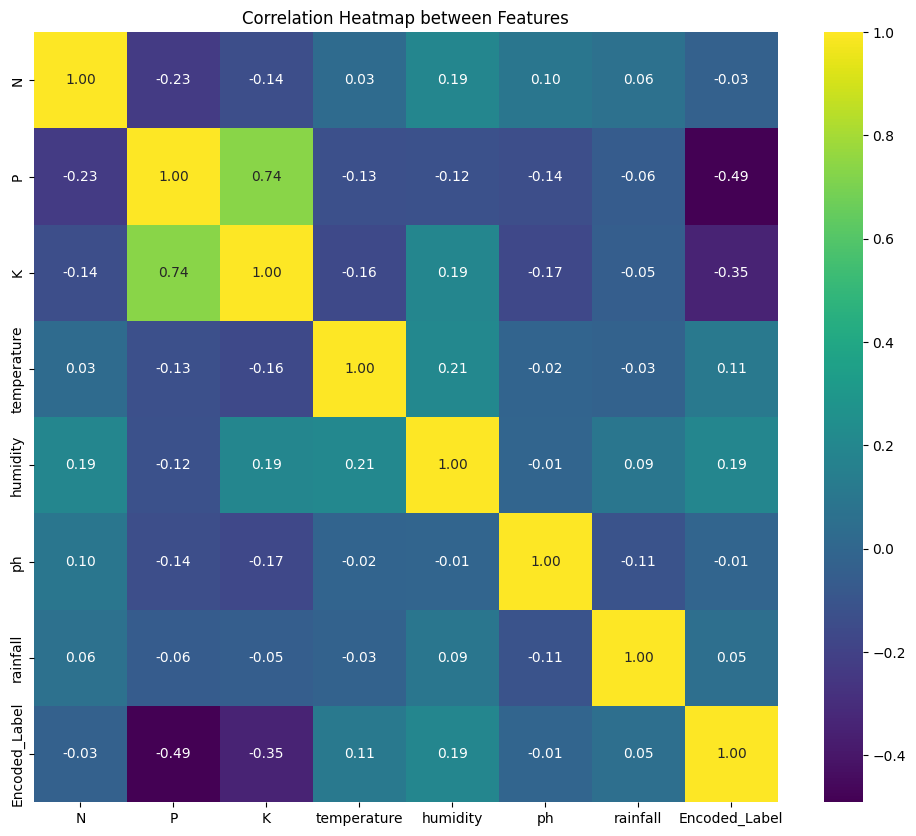

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'label' column
data_raw = data_raw.drop(columns=['label'])


# Calculate the correlation matrix
correlation_matrix = data_raw.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix,cmap='viridis', annot=True, fmt=".2f")
plt.title('Correlation Heatmap between Features')
plt.show()

In [7]:
data_raw.head()

,N,P,K,temperature,humidity,ph,rainfall,Encoded_Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


## Creating the splits

In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'data_raw' is your DataFrame containing the data
# Assuming 'X' is your input features DataFrame and 'y' is your target variable

# Extract input features and target variable
X = data_raw.drop(columns=['Encoded_Label'])
y = data_raw['Encoded_Label']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test sets
print("Train set - X:", X_train.shape, " y:", y_train.shape)
print("Test set - X:", X_test.shape, " y:", y_test.shape)

Train set - X: (1540, 7)  y: (1540,)
Test set - X: (660, 7)  y: (660,)


## Checking Feature Importance


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Initialize and fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Get feature importance using coefficients from logistic regression
feature_importance = log_reg.coef_[0]

# Create DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

# Select important features using a threshold
selector = SelectFromModel(log_reg, threshold=0.1)
selector.fit(X_train, y_train)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Print selected features
print("\nSelected Features:")
print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Feature Importance:
       Feature  Importance
2            K    0.971546
1            P    0.307351
5           ph   -0.056155
4     humidity   -0.210872
3  temperature   -0.215642
6     rainfall   -0.315631
0            N   -0.602926

Selected Features:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


### Understanding of Results

- **`K` (Potassium)**:
  - **Positive Importance** (`0.971546`): A positive coefficient suggests that higher levels of potassium in the soil are associated with an increase in the likelihood of the target variable (e.g., higher crop yields).
  - Therefore, higher potassium levels may lead to improved crop health and productivity.

- **`P` (Phosphorus)**:
  - **Positive Importance** (`0.307351`): A positive coefficient indicates that higher levels of phosphorus in the soil are associated with an increase in the likelihood of the target variable (e.g., higher crop yields).
  - Higher phosphorus levels promote healthy root growth, improving nutrient absorption and overall plant vigor, which leads to better crop yields.

- **`ph` (pH)**:
  - **Negative Importance** (`-0.056155`): A negative coefficient suggests that extreme pH levels in the soil may negatively impact the likelihood of the target variable (e.g., lower crop yields).
  - Extremely high or low pH levels can affect soil structure and nutrient availability, leading to nutrient deficiencies or toxicities in plants.

- **`temperature`**:
  - **Negative Importance** (`-0.215642`): A negative coefficient indicates that extreme temperature conditions (either too high or too low) negatively impact the likelihood of the target variable (e.g., lower crop yields).
  - Extreme temperatures can stress plants, disrupt physiological processes, and inhibit growth and development.

- **`humidity`**:
  - **Negative Importance** (`-0.210872`): A negative coefficient suggests that extreme humidity levels negatively impact the likelihood of the target variable (e.g., lower crop yields).
  - Extreme humidity can lead to issues such as disease susceptibility, reduced photosynthesis, and poor nutrient uptake.

- **`rainfall`**:
  - **Negative Importance** (`-0.315631`): A negative coefficient indicates that lower rainfall levels are associated with a decrease in the likelihood of the target variable (e.g., lower crop yields).
  - Adequate rainfall is essential for providing moisture for plant growth and supporting various physiological processes. Insufficient rainfall can lead to water stress and reduced crop yields.

- **`N` (Nitrogen)**:
  - **Negative Importance** (`-0.602926`): A negative coefficient suggests that excessively high levels of nitrogen in the soil may have a detrimental effect on the likelihood of the target variable (e.g., lower crop yields).
  - Therefore, maintaining nitrogen levels within an optimal range is crucial for maximizing crop yields.


## Building Random Forest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)* 100

# Print the accuracy
print("Random Forest Classifier Accuracy:", "{:.2f}%".format(accuracy))


Random Forest Classifier Accuracy: 99.09%


In [11]:
# Prepare the input data for prediction
input_data = [[85, 58, 41, 21.770462, 80.319644, 7.038096, 226.655537]] # Example input data with 7 features

# Make predictions for the input data
predicted_label = rf_classifier.predict(input_data)

# Print the predicted label
print("Predicted Label:", predicted_label[0])

for key, val in label_mapping.items():
  if val == predicted_label[0]:
    print(f"Your best shot at farming is to plant {key}")




Predicted Label: 20
Your best shot at farming is to plant rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Store the RF model

In [12]:
from joblib import dump

# Assuming 'rf_classifier' is your trained Random Forest classifier
# Save the model to a file named 'crops.joblib'
dump(rf_classifier, 'crops.joblib')

['crops.joblib']

## Setting up Streamlit

In [13]:
pip install streamlit

### Create an app python file to store the streamlit code

In [14]:
%%writefile app.py

Overwriting app.py


## How to run the Streamlit app

- Get the IPV4 address - code below
- Run the Local tunnel and Streamlit - code below
- Click on the "your url is" URL
- In the password box, enter your IPV4 address and click submit
- Streamlit app should run in the same tab

In [15]:
! wget -q -O - ipv4.icanhazip.com

34.106.71.25


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.71.25:8501

npx: installed 22 in 3.856s
your url is: https://new-shoes-count.loca.lt
